In [1]:
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

## Table 5 Figure

Creating confusion matrices for report

In [2]:
exp3_rob_df = pd.read_csv("/kaggle/input/nli-results/exp3_roberta-mnli_test_results.csv")
exp3_rob_df

,Unnamed: 0,id,premise,hypothesis,type,expected_label,predicted_label
0,0,0,"If Charlotte passes her driving test, her pare...",Charlotte has parents.,type5_possessive,ENTAILMENT,CONTRADICTION
1,1,1,It's not the case that if Charlotte passes her...,Charlotte has parents.,type5_possessive,ENTAILMENT,CONTRADICTION
2,2,2,Sam believes that if Charlotte passes her driv...,Charlotte has parents.,type5_possessive,ENTAILMENT,CONTRADICTION
3,3,3,Is it true that if Charlotte passes her drivin...,Charlotte has parents.,type5_possessive,ENTAILMENT,CONTRADICTION
4,4,4,"If Lily takes the train to the city, her frien...",Lily has a friend.,type5_possessive,ENTAILMENT,CONTRADICTION
...,...,...,...,...,...,...,...
2362,2362,2362,"If Sophia decides to attend the concert, his b...",Sophia has a close friend.,type5_possessive,NEUTRAL,CONTRADICTION
2363,2363,2363,It's not the case that if Sophia decides to at...,Sophia has a close friend.,type5_possessive,NEUTRAL,CONTRADICTION
2364,2364,2364,Sam believes that if Sophia decides to attend ...,Sophia has a close friend.,type5_possessive,NEUTRAL,CONTRADICTION
2365,2365,2365,Is it true that if Sophia decides to attend th...,Sophia has a close friend.,type5_possessive,NEUTRAL,CONTRADICTION


In [3]:
labels=['ENTAILMENT','NEUTRAL','CONTRADICTION']

In [4]:
labels_lower = ['Entailment', 'Neutral', 'Contradiction']

In [5]:
exp3_rob_df = pd.read_csv("/kaggle/input/nli-results/exp3_roberta-mnli_test_results.csv")
confusion_matrix(exp3_rob_df['expected_label'], exp3_rob_df['predicted_label'], labels=['ENTAILMENT','NEUTRAL','CONTRADICTION'])

array([[  0,  90, 630],
       [  0, 166, 713],
       [  0, 325, 443]])

In [6]:
exp3_rob_df = pd.read_csv("/kaggle/input/nli-results/exp3_roberta-mnli_test_results.csv")
exp3_rob_cm = pd.DataFrame(confusion_matrix(exp3_rob_df['expected_label'], exp3_rob_df['predicted_label'],labels=labels),index=labels, columns=labels)
exp3_rob_cm

,ENTAILMENT,NEUTRAL,CONTRADICTION
ENTAILMENT,0,90,630
NEUTRAL,0,166,713
CONTRADICTION,0,325,443


In [7]:
exp3_deb_df = pd.read_csv("/kaggle/input/nli-results/exp3_deberta_test_results.csv")
exp3_deb_cm = confusion_matrix(exp3_deb_df['expected_label'], exp3_deb_df['predicted_label'],labels=labels)
exp3_deb_cm = pd.DataFrame(exp3_deb_cm,index=labels_lower, columns=labels_lower)
exp3_deb_cm

,Entailment,Neutral,Contradiction
Entailment,0,11,709
Neutral,0,360,519
Contradiction,0,181,587


In [8]:
exp3_deb_df['predicted_label'].value_counts()

predicted_label
CONTRADICTION    1815
NEUTRAL           552
Name: count, dtype: int64

In [9]:
exp3_glove_df = pd.read_csv("/kaggle/input/nli-results/exp3_glove_results.csv")
exp3_glove_df['gold_label'] = exp3_glove_df['gold_label'].map({'E':'ENTAILMENT','N':'NEUTRAL','C':'CONTRADICTION'})
exp3_glove_df['predicted_label'] = exp3_glove_df['predicted_label'].map({'E':'ENTAILMENT','N':'NEUTRAL','C':'CONTRADICTION'})
exp3_glove_cm = confusion_matrix(exp3_glove_df['gold_label'], exp3_glove_df['predicted_label'],labels=labels)
exp3_glove_cm = pd.DataFrame(exp3_glove_cm,index=labels_lower, columns=labels_lower)
exp3_glove_cm

,Entailment,Neutral,Contradiction
Entailment,714,6,0
Neutral,864,15,0
Contradiction,717,51,0


In [10]:
exp3_infersent_df = pd.read_csv("/kaggle/input/nli-results/exp3_infersent_results.csv")
exp3_infersent_df['gold_label'] = exp3_infersent_df['gold_label'].map({'E':'ENTAILMENT','N':'NEUTRAL','C':'CONTRADICTION'})
exp3_infersent_df['predicted_label'] = exp3_infersent_df['predicted_label'].map({'E':'ENTAILMENT','N':'NEUTRAL','C':'CONTRADICTION'})
exp3_infersent_cm = confusion_matrix(exp3_infersent_df['gold_label'], exp3_infersent_df['predicted_label'],labels=labels)
exp3_infersent_cm = pd.DataFrame(exp3_infersent_cm,index=labels_lower, columns=labels_lower)
exp3_infersent_cm

,Entailment,Neutral,Contradiction
Entailment,703,17,0
Neutral,844,35,0
Contradiction,729,39,0


In [11]:
exp4_rob_df = pd.read_csv("/kaggle/input/nli-results/exp4_roberta_test_results (2).csv")
exp4_rob_cm = confusion_matrix(exp4_rob_df['expected_label'], exp4_rob_df['predicted_label'],labels=labels)
exp4_rob_cm = pd.DataFrame(exp4_rob_cm,index=labels_lower, columns=labels_lower)

In [12]:
exp4_rob_df['predicted_label'].value_counts()

predicted_label
CONTRADICTION    1213
ENTAILMENT        684
NEUTRAL           470
Name: count, dtype: int64

In [13]:
exp4_deb_df = pd.read_csv("/kaggle/input/nli-results/exp4_deberta_test_results (1).csv")
exp4_deb_cm = confusion_matrix(exp4_deb_df['expected_label'], exp4_deb_df['predicted_label'],labels=labels)
exp4_deb_cm = pd.DataFrame(exp4_deb_cm,index=labels_lower, columns=labels_lower)

In [14]:
exp4_glove_df = pd.read_csv("/kaggle/input/nli-results/exp4_glove_results.csv")
exp4_glove_df['gold_label'] = exp4_glove_df['gold_label'].map({'E':'ENTAILMENT','N':'NEUTRAL','C':'CONTRADICTION'})
exp4_glove_df['predicted_label'] = exp4_glove_df['predicted_label'].map({'E':'ENTAILMENT','N':'NEUTRAL','C':'CONTRADICTION'})
exp4_glove_cm = confusion_matrix(exp4_glove_df['gold_label'], exp4_glove_df['predicted_label'],labels=labels)
exp4_glove_cm = pd.DataFrame(exp4_glove_cm,index=labels_lower, columns=labels_lower)
exp4_glove_cm

,Entailment,Neutral,Contradiction
Entailment,333,351,36
Neutral,307,455,117
Contradiction,72,450,246


In [15]:
exp4_infersent_df = pd.read_csv("/kaggle/input/nli-results/exp4_infersent_results.csv")
exp4_infersent_df['gold_label'] = exp4_infersent_df['gold_label'].map({'E':'ENTAILMENT','N':'NEUTRAL','C':'CONTRADICTION'})
exp4_infersent_df['predicted_label'] = exp4_infersent_df['predicted_label'].map({'E':'ENTAILMENT','N':'NEUTRAL','C':'CONTRADICTION'})
exp4_infersent_cm = confusion_matrix(exp4_infersent_df['gold_label'], exp4_infersent_df['predicted_label'],labels=labels)
exp4_infersent_cm = pd.DataFrame(exp4_infersent_cm,index=labels_lower, columns=labels_lower)
exp4_infersent_cm

,Entailment,Neutral,Contradiction
Entailment,163,545,12
Neutral,212,615,52
Contradiction,23,389,356


In [16]:
exp5_rob_df = pd.read_csv("/kaggle/input/nli-results/exp5-roberta_test_results.csv")
exp5_rob_cm = confusion_matrix(exp5_rob_df['expected_label'], exp5_rob_df['predicted_label'],labels=labels)
exp5_rob_cm = pd.DataFrame(exp5_rob_cm,index=labels_lower, columns=labels_lower)

In [17]:
exp5_deb_df = pd.read_csv("/kaggle/input/nli-results/exp5_deberta_test_results.csv")
exp5_deb_cm = confusion_matrix(exp5_deb_df['expected_label'], exp5_deb_df['predicted_label'],labels=labels)
exp5_deb_cm = pd.DataFrame(exp5_deb_cm,index=labels_lower, columns=labels_lower)

In [18]:
exp5_glove_df = pd.read_csv("/kaggle/input/nli-results/Exp5_glove_results.csv")
exp5_glove_df['gold_label'] = exp5_glove_df['gold_label'].map({'E':'ENTAILMENT','N':'NEUTRAL','C':'CONTRADICTION'})
exp5_glove_df['predicted_label'] = exp5_glove_df['predicted_label'].map({'E':'ENTAILMENT','N':'NEUTRAL','C':'CONTRADICTION'})
exp5_glove_cm = confusion_matrix(exp5_glove_df['gold_label'], exp5_glove_df['predicted_label'],labels=labels)
exp5_glove_cm = pd.DataFrame(exp5_glove_cm,index=labels_lower, columns=labels_lower)
exp5_glove_cm

,Entailment,Neutral,Contradiction
Entailment,629,76,15
Neutral,61,733,85
Contradiction,3,16,749


In [19]:
exp5_infersent_df = pd.read_csv("/kaggle/input/nli-results/Exp5_InferSent_results.csv")
exp5_infersent_df['gold_label'] = exp5_infersent_df['gold_label'].map({'E':'ENTAILMENT','N':'NEUTRAL','C':'CONTRADICTION'})
exp5_infersent_df['predicted_label'] = exp5_infersent_df['predicted_label'].map({'E':'ENTAILMENT','N':'NEUTRAL','C':'CONTRADICTION'})
exp5_infersent_cm = confusion_matrix(exp5_infersent_df['gold_label'], exp5_infersent_df['predicted_label'],labels=labels)
exp5_infersent_cm = pd.DataFrame(exp5_infersent_cm,index=labels_lower, columns=labels_lower)
exp5_infersent_cm

,Entailment,Neutral,Contradiction
Entailment,687,31,2
Neutral,28,810,41
Contradiction,3,9,756


In [20]:
fontsize_title = 20  # Title font size
fontsize_labels = 18  # Axis labels font size
fontsize_ticks = 16  # Tick labels font size
fontsize_numbers = 18  # Numbers inside heatmaps

<Axes: >

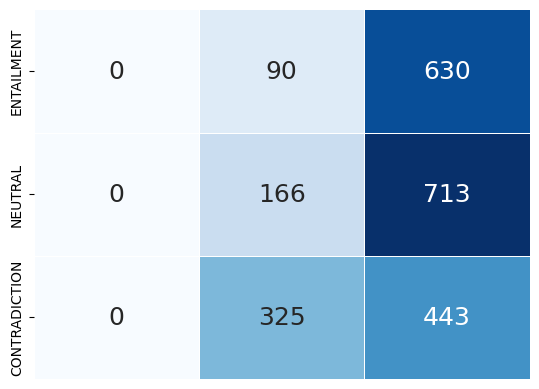

In [21]:
sns.heatmap(exp3_rob_cm, annot=True, cmap="Blues", cbar=False, xticklabels=False, 
             linewidths=0.5, fmt='d',annot_kws={"size": fontsize_numbers})

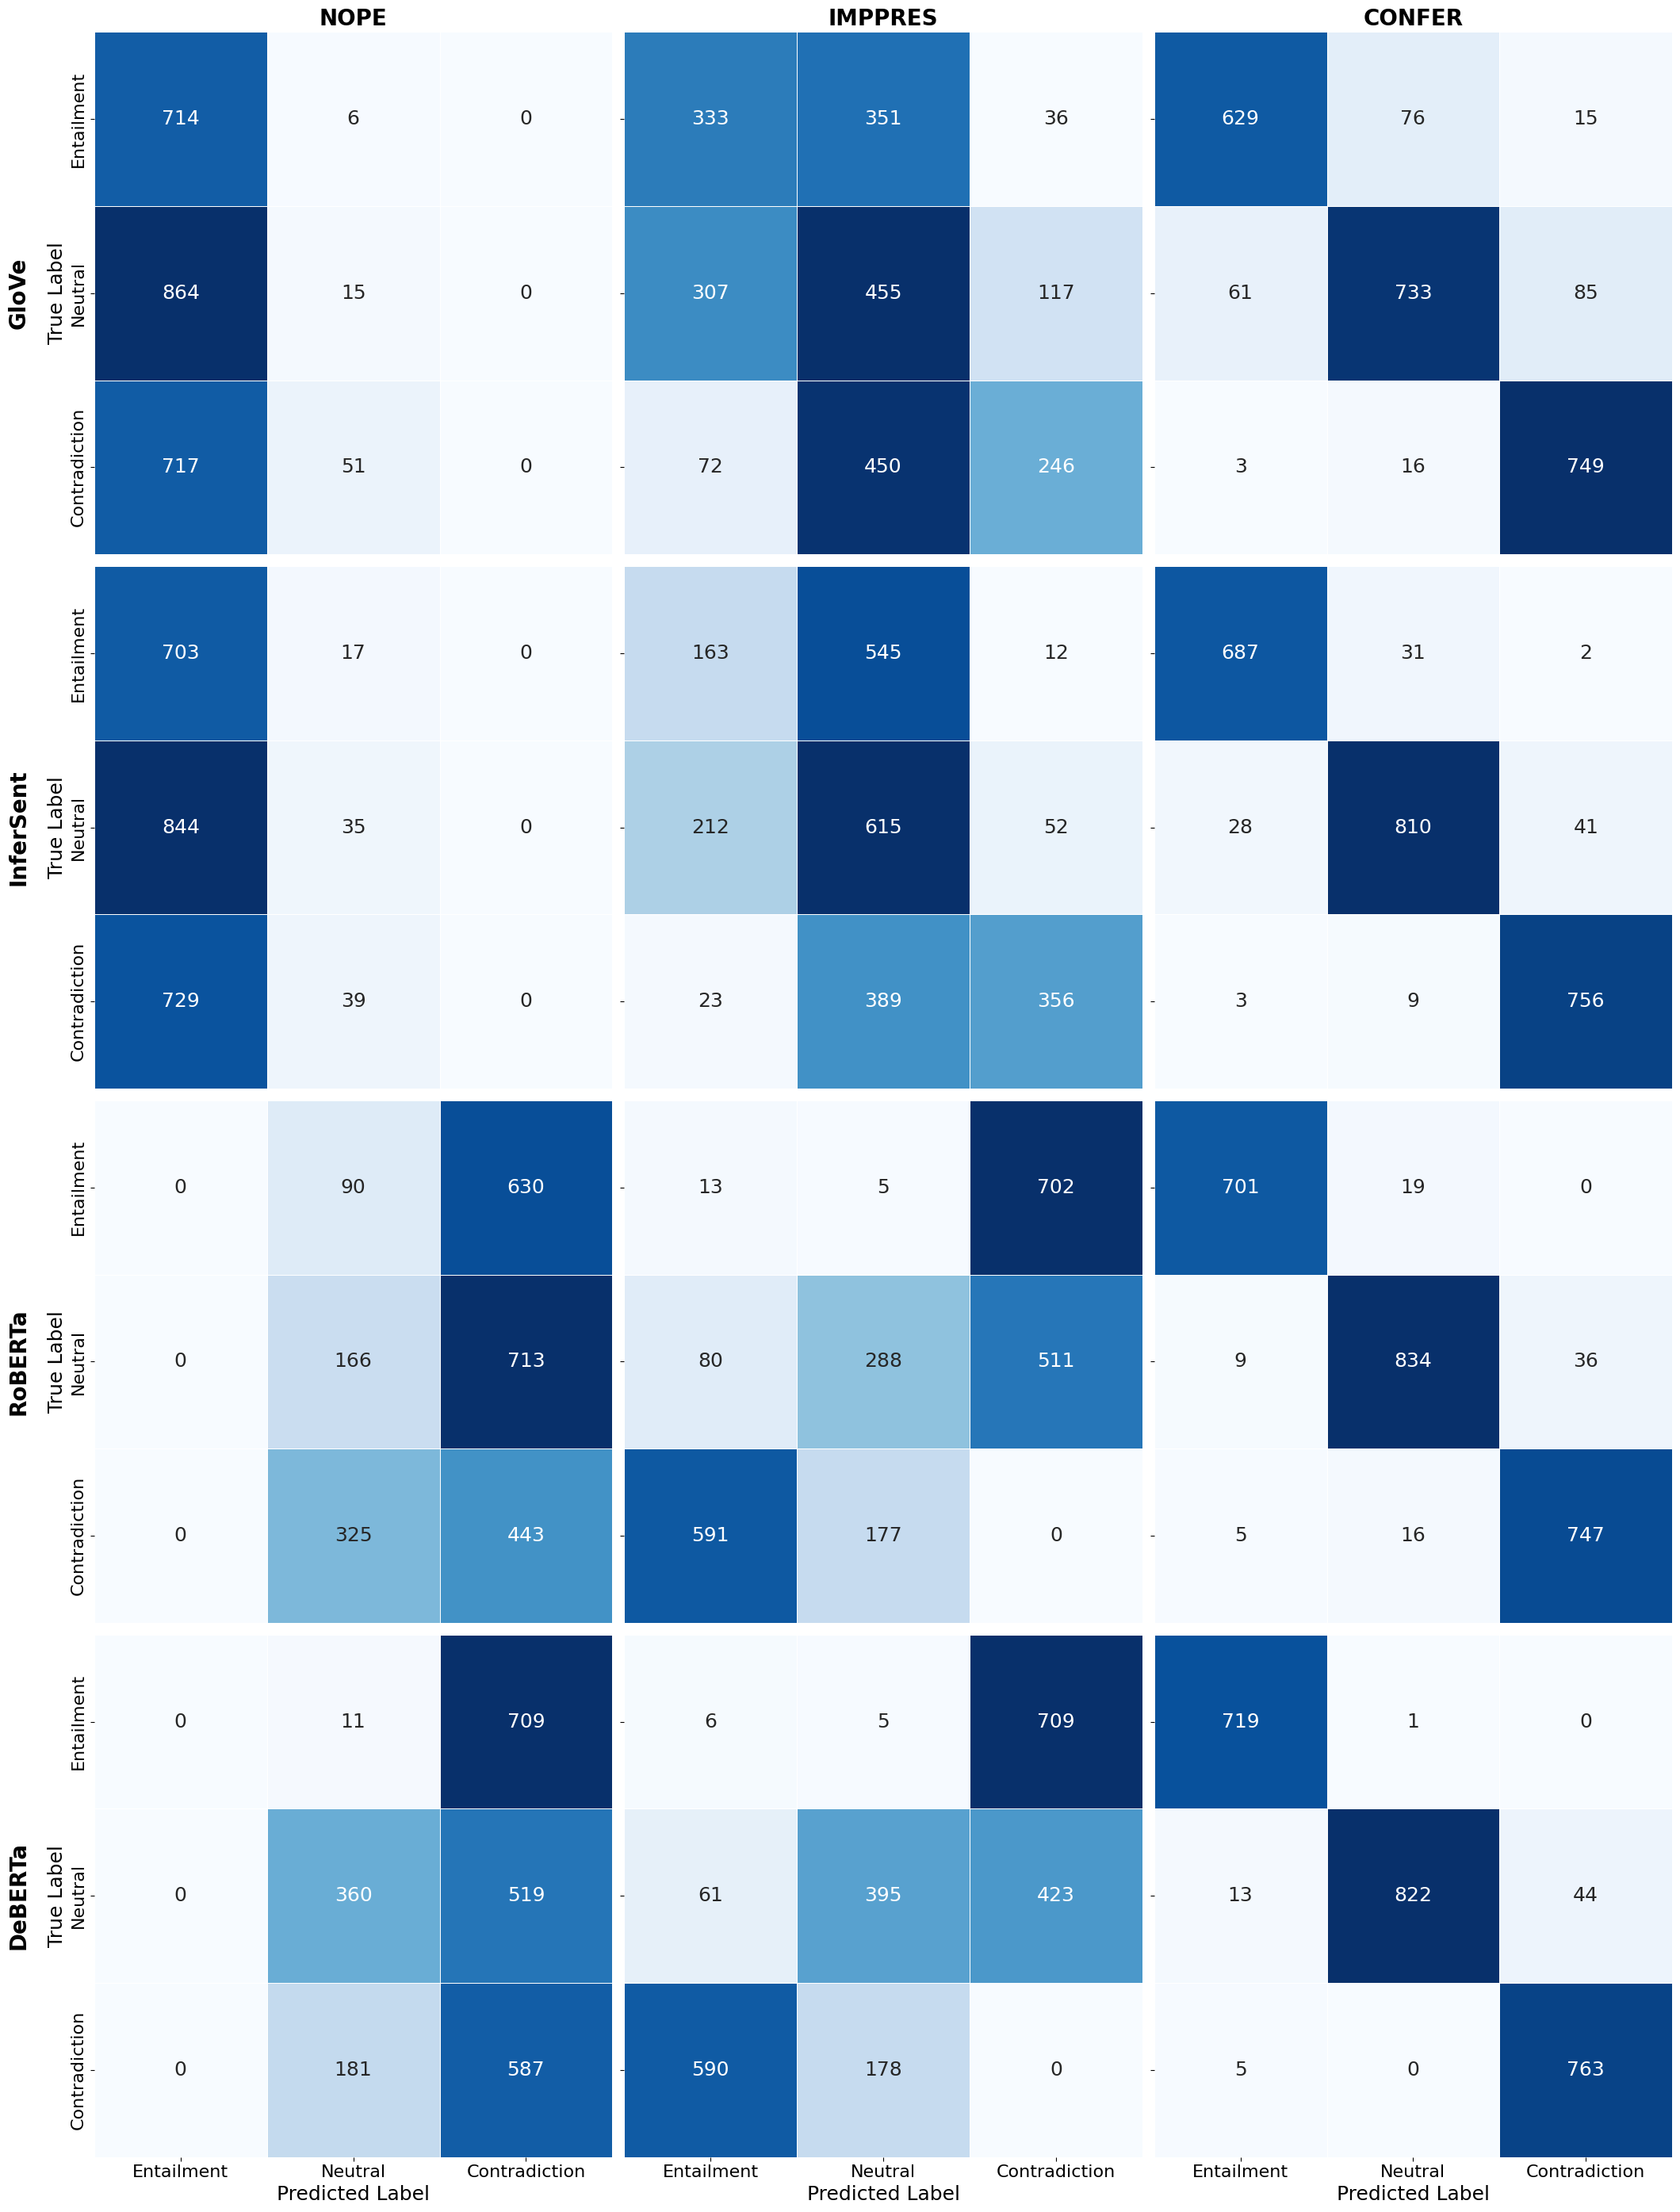

In [22]:
# With GloVe and InferSent 
fig, axes = plt.subplots(4, 3, figsize=(21, 28), sharey=True)

# GloVe 3
sns.heatmap(exp3_glove_cm, annot=True, cmap="Blues", cbar=False, ax=axes[0,0], xticklabels=False, 
             linewidths=0.5, fmt='d',annot_kws={"size": fontsize_numbers})
axes[0,0].set_title("NOPE", fontsize=fontsize_title, weight='bold') 
axes[0,0].set_ylabel("True Label", fontsize=fontsize_labels)
axes[0,0].text(-0.5, 1.5, "GloVe", fontsize=fontsize_title, weight='bold', rotation=90, va='center')
axes[0,0].tick_params(axis='both', which='major', labelsize=fontsize_ticks)

# GloVe 4
sns.heatmap(exp4_glove_cm, annot=True, cmap="Blues", cbar=False, ax=axes[0,1], xticklabels=False, 
            linewidths=0.5, fmt='d',annot_kws={"size": fontsize_numbers})
axes[0,1].set_title("IMPPRES", fontsize=fontsize_title, weight='bold')

# GloVe 5
sns.heatmap(exp5_glove_cm, annot=True, cmap="Blues", cbar=False, ax=axes[0,2], xticklabels=False, 
            linewidths=0.5, fmt='d',annot_kws={"size": fontsize_numbers})
axes[0,2].set_title("CONFER", fontsize=fontsize_title, weight='bold') 

# InferSent 3
sns.heatmap(exp3_infersent_cm, annot=True, cmap="Blues", cbar=False, ax=axes[1,0], xticklabels=False, 
             linewidths=0.5, fmt='d',annot_kws={"size": fontsize_numbers})
# axes[1,0].set_title("NOPE", fontsize=fontsize_title, weight='bold') 
axes[1,0].set_ylabel("True Label", fontsize=fontsize_labels)
axes[1,0].text(-0.5, 1.5, "InferSent", fontsize=fontsize_title, weight='bold', rotation=90, va='center')
axes[1,0].tick_params(axis='both', which='major', labelsize=fontsize_ticks)

# InferSent 4
sns.heatmap(exp4_infersent_cm, annot=True, cmap="Blues", cbar=False, ax=axes[1,1], xticklabels=False, 
            linewidths=0.5, fmt='d',annot_kws={"size": fontsize_numbers})
# axes[1,1].set_title("IMPPRES", fontsize=fontsize_title, weight='bold')

# InferSent 5
sns.heatmap(exp5_infersent_cm, annot=True, cmap="Blues", cbar=False, ax=axes[1,2], xticklabels=False, 
            linewidths=0.5, fmt='d',annot_kws={"size": fontsize_numbers})
# axes[1,2].set_title("CONFER", fontsize=fontsize_title, weight='bold')

# Roberta 3
sns.heatmap(exp3_rob_cm, annot=True, cmap="Blues", cbar=False, ax=axes[2,0], xticklabels=False, 
             linewidths=0.5, fmt='d',annot_kws={"size": fontsize_numbers})
# axes[2,0].set_title("NOPE", fontsize=fontsize_title, weight='bold') 
axes[2,0].set_ylabel("True Label", fontsize=fontsize_labels)
axes[2,0].text(-0.5, 1.5, "RoBERTa", fontsize=fontsize_title, weight='bold', rotation=90, va='center')
axes[2,0].tick_params(axis='both', which='major', labelsize=fontsize_ticks)

# Roberta 4
sns.heatmap(exp4_rob_cm, annot=True, cmap="Blues", cbar=False, ax=axes[2,1], xticklabels=False, 
            linewidths=0.5, fmt='d',annot_kws={"size": fontsize_numbers})
# axes[2,1].set_title("IMPPRES", fontsize=fontsize_title, weight='bold')

# Roberta 5
sns.heatmap(exp5_rob_cm, annot=True, cmap="Blues", cbar=False, ax=axes[2,2], xticklabels=False, 
            linewidths=0.5, fmt='d',annot_kws={"size": fontsize_numbers})
# axes[2,2].set_title("CONFER", fontsize=fontsize_title, weight='bold')

# Deberta 3 
sns.heatmap(exp3_deb_cm, annot=True, cmap="Blues", cbar=False, ax=axes[3,0], xticklabels=labels_lower, 
            linewidths=0.5, fmt='d',annot_kws={"size": fontsize_numbers})
axes[3,0].set_ylabel("True Label", fontsize=fontsize_labels)
axes[3,0].text(-0.5, 1.5, "DeBERTa", fontsize=fontsize_title, weight='bold', rotation=90, va='center')
axes[3,0].tick_params(axis='both', which='major', labelsize=fontsize_ticks)
axes[3,0].set_xlabel("Predicted Label",fontsize=fontsize_labels)

# Deberta 4
sns.heatmap(exp4_deb_cm, annot=True, cmap="Blues", cbar=False, ax=axes[3,1], xticklabels=labels_lower, 
            linewidths=0.5, fmt='d',annot_kws={"size": fontsize_numbers})
axes[3,1].tick_params(axis='both', which='major', labelsize=fontsize_ticks)
axes[3,1].set_xlabel("Predicted Label",fontsize=fontsize_labels)

# Deberta 5
sns.heatmap(exp5_deb_cm, annot=True, cmap="Blues", cbar=False, ax=axes[3,2], xticklabels=labels_lower, 
            linewidths=0.5, fmt='d',annot_kws={"size": fontsize_numbers})
axes[3,2].tick_params(axis='both', which='major', labelsize=fontsize_ticks)
axes[3,2].set_xlabel("Predicted Label",fontsize=fontsize_labels)

plt.tight_layout()
plt.savefig("table6.pdf", format="pdf", dpi=300, bbox_inches="tight")
plt.show()

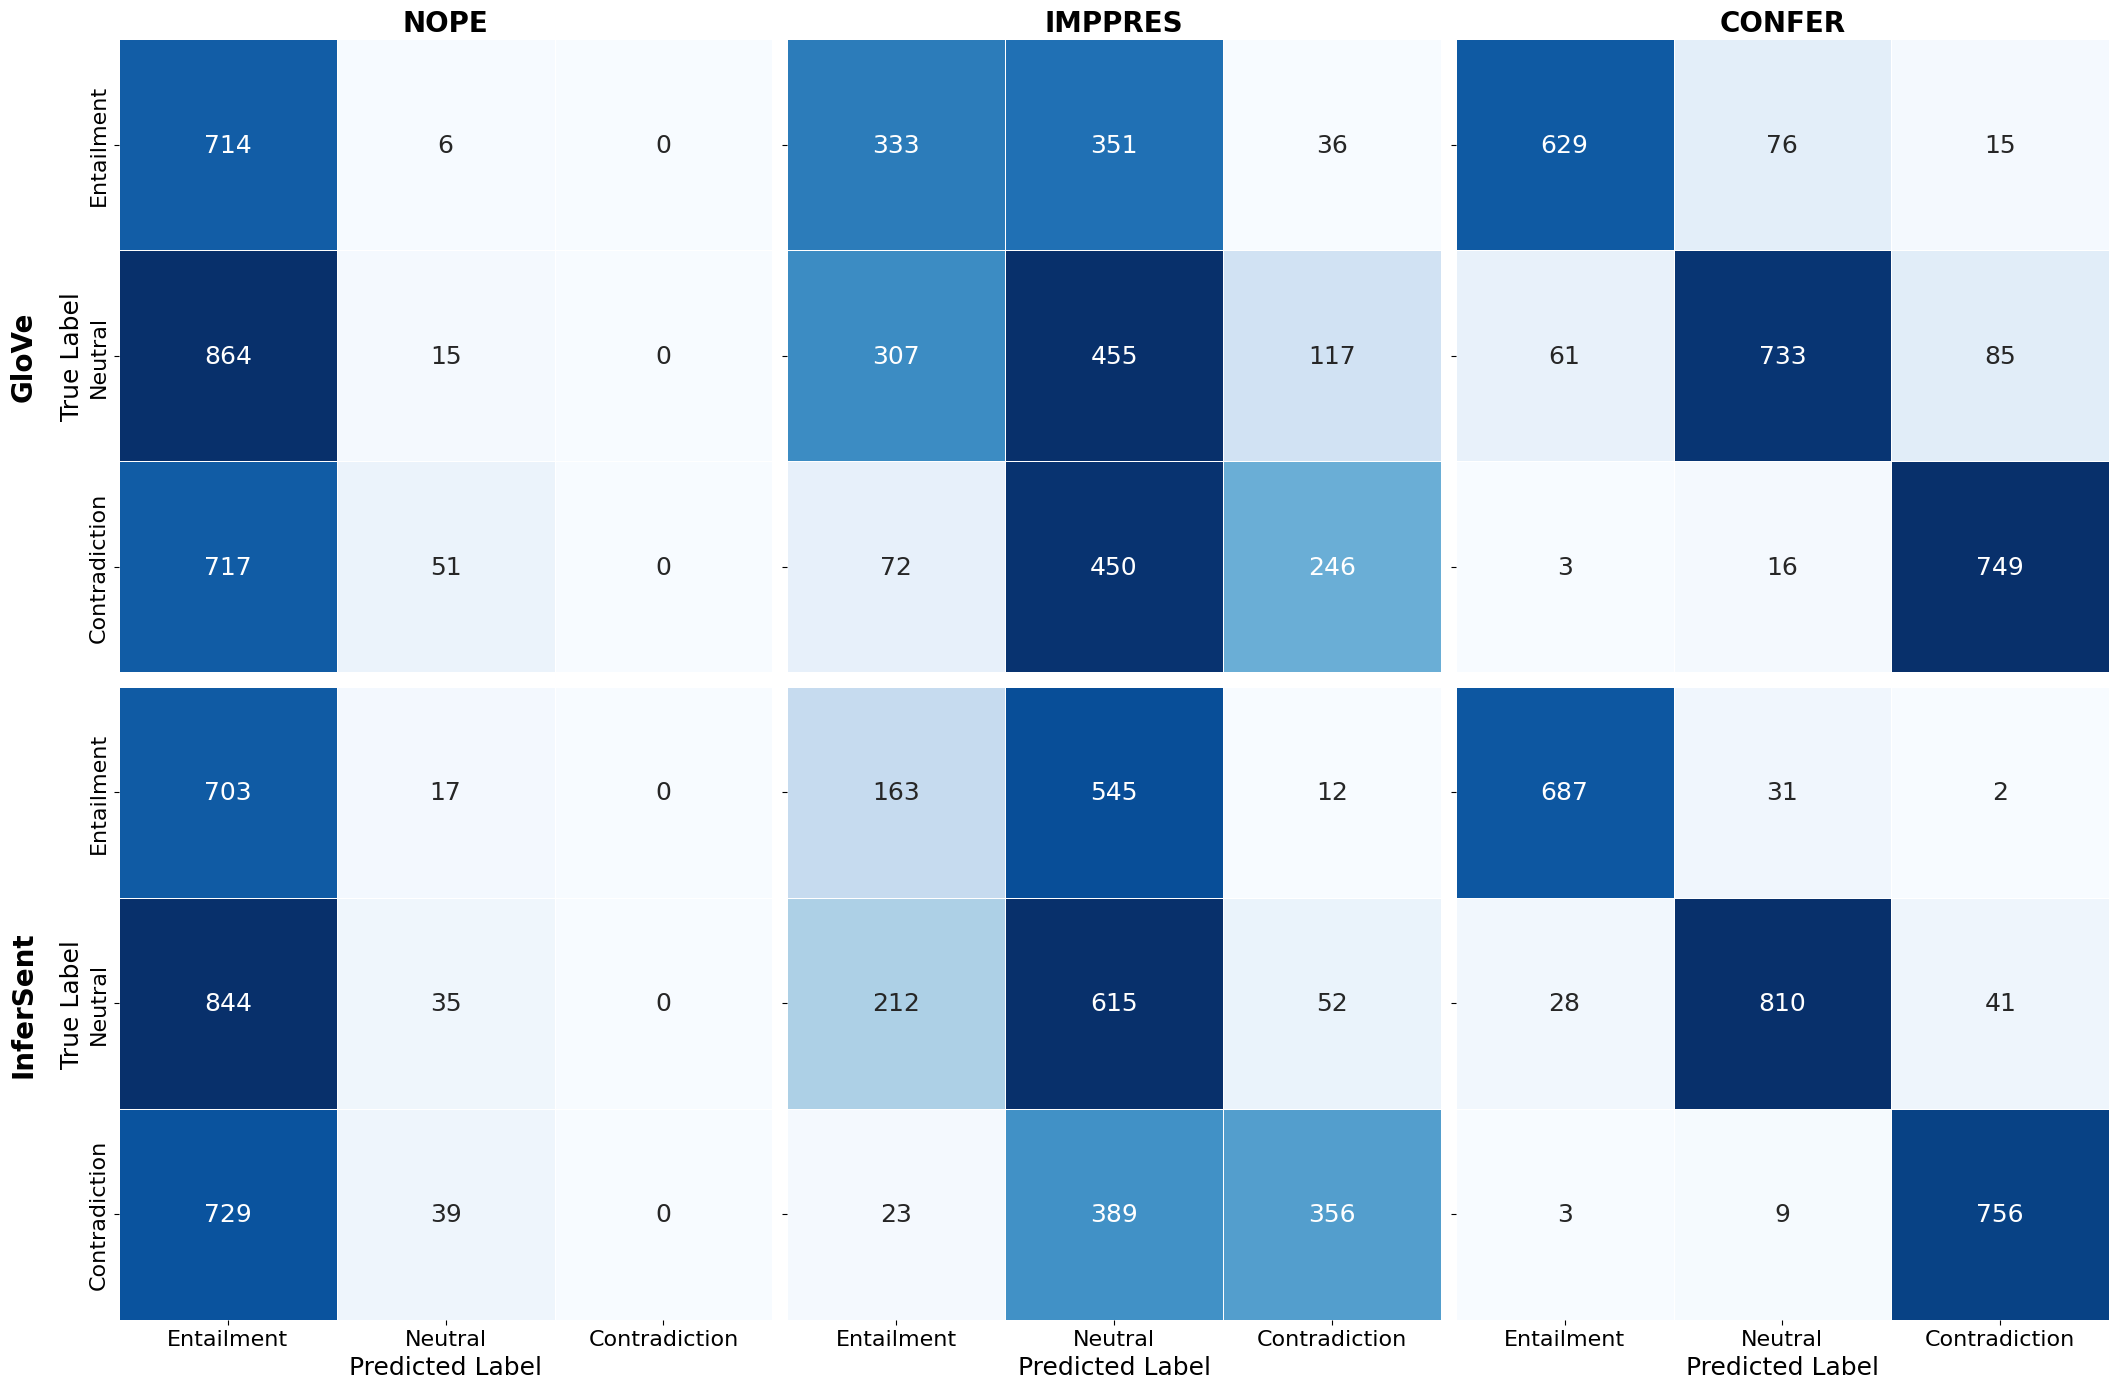

In [28]:
# Fig 5 
fig, axes = plt.subplots(2, 3, figsize=(21, 14), sharey=True)

# GloVe 3
sns.heatmap(exp3_glove_cm, annot=True, cmap="Blues", cbar=False, ax=axes[0,0], xticklabels=False, 
             linewidths=0.5, fmt='d',annot_kws={"size": fontsize_numbers})
axes[0,0].set_title("NOPE", fontsize=fontsize_title, weight='bold') 
axes[0,0].set_ylabel("True Label", fontsize=fontsize_labels)
axes[0,0].text(-0.5, 1.5, "GloVe", fontsize=fontsize_title, weight='bold', rotation=90, va='center')
axes[0,0].tick_params(axis='both', which='major', labelsize=fontsize_ticks)

# GloVe 4
sns.heatmap(exp4_glove_cm, annot=True, cmap="Blues", cbar=False, ax=axes[0,1], xticklabels=False, 
            linewidths=0.5, fmt='d',annot_kws={"size": fontsize_numbers})
axes[0,1].set_title("IMPPRES", fontsize=fontsize_title, weight='bold')

# GloVe 5
sns.heatmap(exp5_glove_cm, annot=True, cmap="Blues", cbar=False, ax=axes[0,2], xticklabels=False, 
            linewidths=0.5, fmt='d',annot_kws={"size": fontsize_numbers})
axes[0,2].set_title("CONFER", fontsize=fontsize_title, weight='bold')

# InferSent 3 
sns.heatmap(exp3_infersent_cm, annot=True, cmap="Blues", cbar=False, ax=axes[1,0], xticklabels=labels_lower, 
            linewidths=0.5, fmt='d',annot_kws={"size": fontsize_numbers})
axes[1,0].set_ylabel("True Label", fontsize=fontsize_labels)
axes[1,0].text(-0.5, 1.5, "InferSent", fontsize=fontsize_title, weight='bold', rotation=90, va='center')
axes[1,0].tick_params(axis='both', which='major', labelsize=fontsize_ticks)
axes[1,0].set_xlabel("Predicted Label",fontsize=fontsize_labels)

# InferSent 4
sns.heatmap(exp4_infersent_cm, annot=True, cmap="Blues", cbar=False, ax=axes[1,1], xticklabels=labels_lower, 
            linewidths=0.5, fmt='d',annot_kws={"size": fontsize_numbers})
axes[1,1].tick_params(axis='both', which='major', labelsize=fontsize_ticks)
axes[1,1].set_xlabel("Predicted Label",fontsize=fontsize_labels)

# InferSent 5
sns.heatmap(exp5_infersent_cm, annot=True, cmap="Blues", cbar=False, ax=axes[1,2], xticklabels=labels_lower, 
            linewidths=0.5, fmt='d',annot_kws={"size": fontsize_numbers})
axes[1,2].tick_params(axis='both', which='major', labelsize=fontsize_ticks)
axes[1,2].set_xlabel("Predicted Label",fontsize=fontsize_labels)

plt.tight_layout()
plt.savefig("baselines_Exp3_5.pdf", format="pdf", dpi=300, bbox_inches="tight")
plt.show()

Text(0.5, 124.72222222222219, 'Predicted Label')

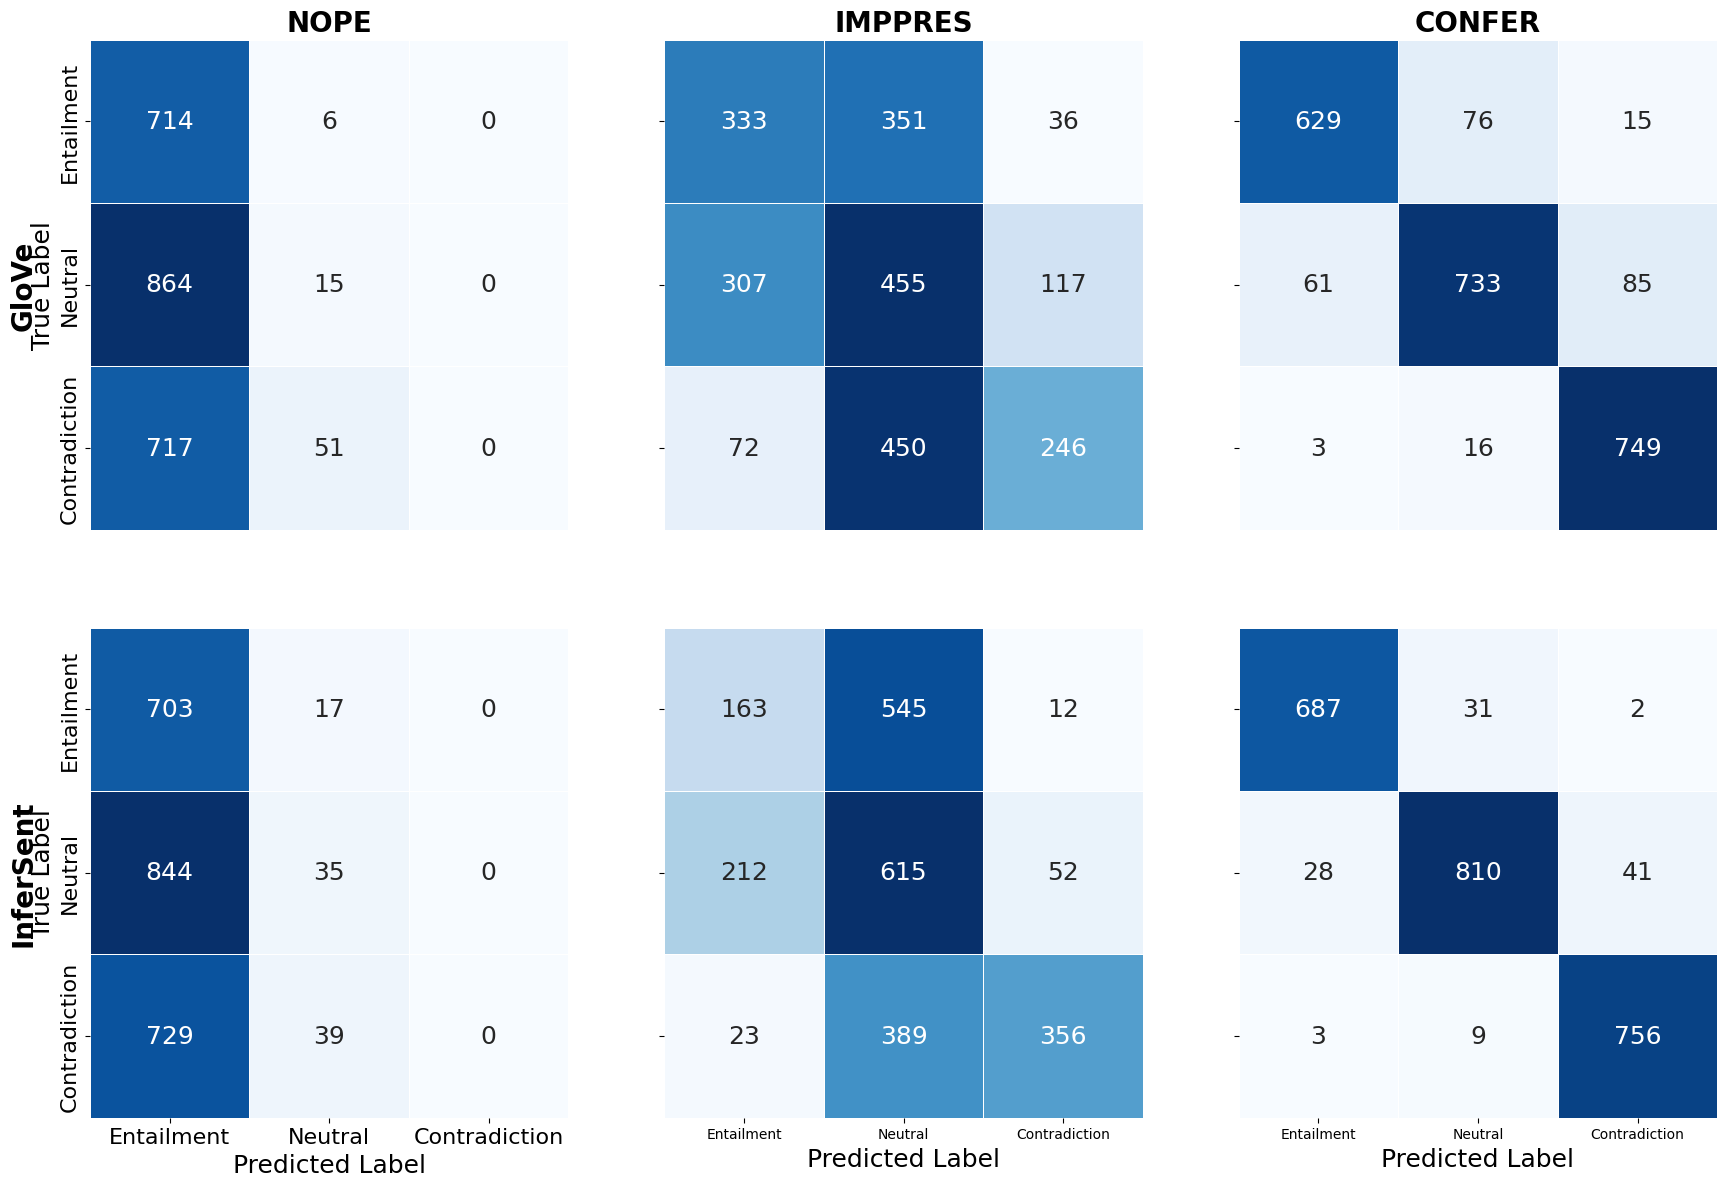

In [25]:
# With GloVe and InferSent 
fig, axes = plt.subplots(2, 3, figsize=(21, 14), sharey=True)

# GloVe 3
sns.heatmap(exp3_glove_cm, annot=True, cmap="Blues", cbar=False, ax=axes[0,0], xticklabels=False, 
             linewidths=0.5, fmt='d',annot_kws={"size": fontsize_numbers})
axes[0,0].set_title("NOPE", fontsize=fontsize_title, weight='bold') 
axes[0,0].set_ylabel("True Label", fontsize=fontsize_labels)
axes[0,0].text(-0.5, 1.5, "GloVe", fontsize=fontsize_title, weight='bold', rotation=90, va='center')
axes[0,0].tick_params(axis='both', which='major', labelsize=fontsize_ticks)

# GloVe 4
sns.heatmap(exp4_glove_cm, annot=True, cmap="Blues", cbar=False, ax=axes[0,1], xticklabels=False, 
            linewidths=0.5, fmt='d',annot_kws={"size": fontsize_numbers})
axes[0,1].set_title("IMPPRES", fontsize=fontsize_title, weight='bold')

# GloVe 5
sns.heatmap(exp5_glove_cm, annot=True, cmap="Blues", cbar=False, ax=axes[0,2], xticklabels=False, 
            linewidths=0.5, fmt='d',annot_kws={"size": fontsize_numbers})
axes[0,2].set_title("CONFER", fontsize=fontsize_title, weight='bold') 

# InferSent 3
sns.heatmap(exp3_infersent_cm, annot=True, cmap="Blues", cbar=False, ax=axes[1,0], xticklabels=labels_lower, 
             linewidths=0.5, fmt='d',annot_kws={"size": fontsize_numbers})
# axes[1,0].set_title("NOPE", fontsize=fontsize_title, weight='bold') 
axes[1,0].set_ylabel("True Label", fontsize=fontsize_labels)
axes[1,0].text(-0.5, 1.5, "InferSent", fontsize=fontsize_title, weight='bold', rotation=90, va='center')
axes[1,0].tick_params(axis='both', which='major', labelsize=fontsize_ticks)
axes[1,0].set_xlabel("Predicted Label",fontsize=fontsize_labels)

# InferSent 4
sns.heatmap(exp4_infersent_cm, annot=True, cmap="Blues", cbar=False, ax=axes[1,1], xticklabels=labels_lower, 
            linewidths=0.5, fmt='d',annot_kws={"size": fontsize_numbers})
axes[1,1].set_xlabel("Predicted Label",fontsize=fontsize_labels)
# axes[1,1].set_title("IMPPRES", fontsize=fontsize_title, weight='bold')

# InferSent 5
sns.heatmap(exp5_infersent_cm, annot=True, cmap="Blues", cbar=False, ax=axes[1,2], xticklabels=labels_lower, 
            linewidths=0.5, fmt='d',annot_kws={"size": fontsize_numbers})
axes[1,2].set_xlabel("Predicted Label",fontsize=fontsize_labels)
# axes[1,2].set_title("CONFER", fontsize=fontsize_title, weight='bold')

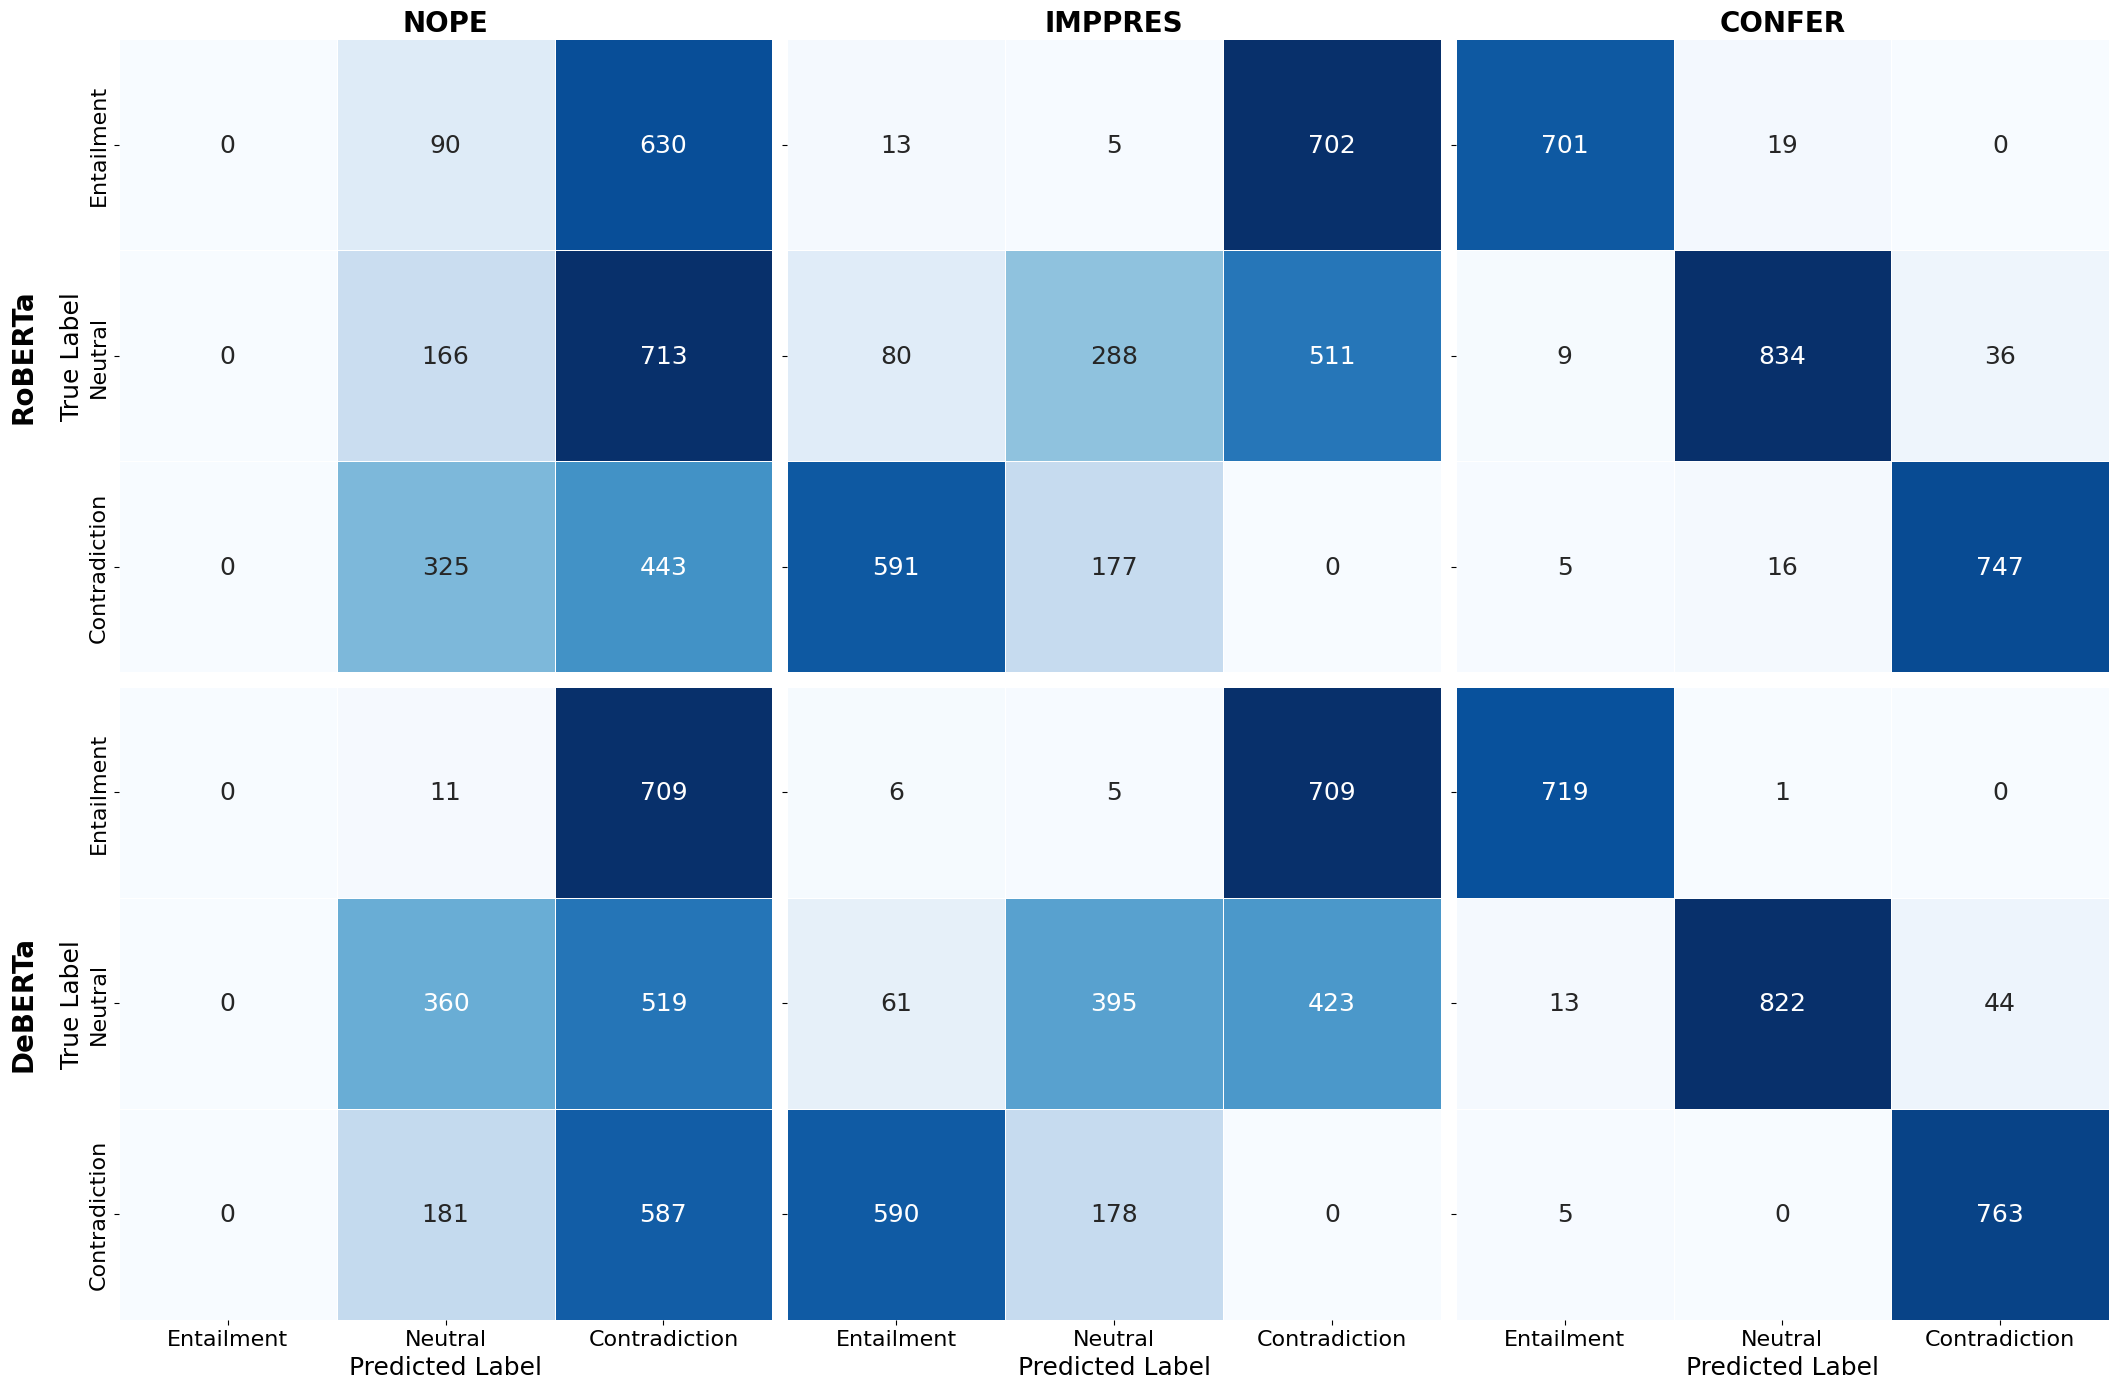

In [29]:
# Fig 5 
fig, axes = plt.subplots(2, 3, figsize=(21, 14), sharey=True)

# Roberta 3
sns.heatmap(exp3_rob_cm, annot=True, cmap="Blues", cbar=False, ax=axes[0,0], xticklabels=False, 
             linewidths=0.5, fmt='d',annot_kws={"size": fontsize_numbers})
axes[0,0].set_title("NOPE", fontsize=fontsize_title, weight='bold') 
axes[0,0].set_ylabel("True Label", fontsize=fontsize_labels)
axes[0,0].text(-0.5, 1.5, "RoBERTa", fontsize=fontsize_title, weight='bold', rotation=90, va='center')
axes[0,0].tick_params(axis='both', which='major', labelsize=fontsize_ticks)

# Roberta 4
sns.heatmap(exp4_rob_cm, annot=True, cmap="Blues", cbar=False, ax=axes[0,1], xticklabels=False, 
            linewidths=0.5, fmt='d',annot_kws={"size": fontsize_numbers})
axes[0,1].set_title("IMPPRES", fontsize=fontsize_title, weight='bold')

# Roberta 5
sns.heatmap(exp5_rob_cm, annot=True, cmap="Blues", cbar=False, ax=axes[0,2], xticklabels=False, 
            linewidths=0.5, fmt='d',annot_kws={"size": fontsize_numbers})
axes[0,2].set_title("CONFER", fontsize=fontsize_title, weight='bold')

# Deberta 3 
sns.heatmap(exp3_deb_cm, annot=True, cmap="Blues", cbar=False, ax=axes[1,0], xticklabels=labels_lower, 
            linewidths=0.5, fmt='d',annot_kws={"size": fontsize_numbers})
axes[1,0].set_ylabel("True Label", fontsize=fontsize_labels)
axes[1,0].text(-0.5, 1.5, "DeBERTa", fontsize=fontsize_title, weight='bold', rotation=90, va='center')
axes[1,0].tick_params(axis='both', which='major', labelsize=fontsize_ticks)
axes[1,0].set_xlabel("Predicted Label",fontsize=fontsize_labels)

# Deberta 4
sns.heatmap(exp4_deb_cm, annot=True, cmap="Blues", cbar=False, ax=axes[1,1], xticklabels=labels_lower, 
            linewidths=0.5, fmt='d',annot_kws={"size": fontsize_numbers})
axes[1,1].tick_params(axis='both', which='major', labelsize=fontsize_ticks)
axes[1,1].set_xlabel("Predicted Label",fontsize=fontsize_labels)

# Deberta 5
sns.heatmap(exp5_deb_cm, annot=True, cmap="Blues", cbar=False, ax=axes[1,2], xticklabels=labels_lower, 
            linewidths=0.5, fmt='d',annot_kws={"size": fontsize_numbers})
axes[1,2].tick_params(axis='both', which='major', labelsize=fontsize_ticks)
axes[1,2].set_xlabel("Predicted Label",fontsize=fontsize_labels)

plt.tight_layout()
plt.savefig("nli_Exp3_5.pdf", format="pdf", dpi=300, bbox_inches="tight")
plt.show()

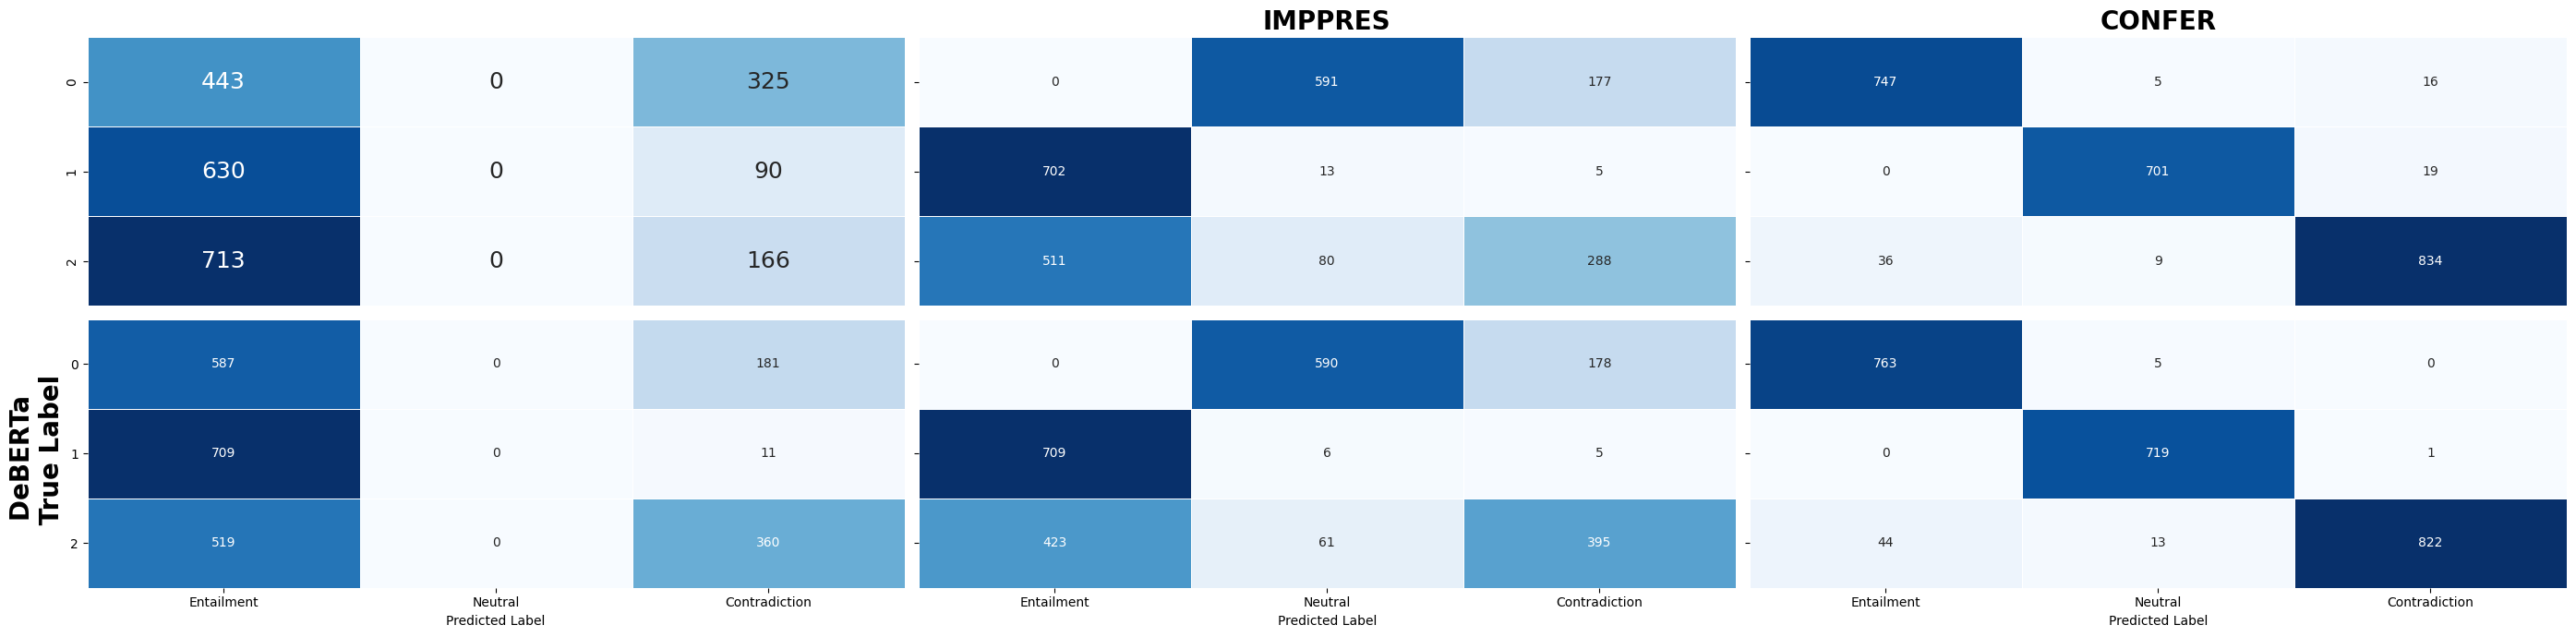

In [62]:
fig, axes = plt.subplots(2, 3, figsize=(28, 7), sharey=True)

labels = ["Entailment", "Neutral", "Contradiction"]

# Roberta 3 
sns.heatmap(exp3_rob_cm, annot=True, cmap="Blues", cbar=False, ax=axes[0,0], xticklabels=False, 
             linewidths=0.5, fmt='d',annot_kws={"size": fontsize_numbers})
# sns.heatmap(exp3_rob_cm, annot=True, cmap="Blues", cbar=False, ax=axes[0,0], xticklabels=False, 
#              linewidths=0.5, fmt='d',annot_kws={"size": fontsize_numbers})
axes[0,0].set_title("NOPE", fontsize=fontsize_title, weight='bold')
axes[0,0].set_ylabel("RoBERTa \n True Label", fontsize=fontsize_title)

# Roberta 4
sns.heatmap(exp4_rob_cm, annot=True, cmap="Blues", cbar=False, ax=axes[0,1], xticklabels=False, 
            linewidths=0.5, fmt='d')
axes[0,1].set_title("IMPPRES", fontsize=fontsize_title, weight='bold')

# Roberta 5
sns.heatmap(exp5_rob_cm, annot=True, cmap="Blues", cbar=False, ax=axes[0,2], xticklabels=False, linewidths=0.5, fmt='d')
axes[0,2].set_title("CONFER", fontsize=fontsize_title, weight='bold')

# Deberta 3 
sns.heatmap(exp3_deb_cm, annot=True, cmap="Blues", cbar=False, ax=axes[1,0], xticklabels=labels, yticklabels=False, linewidths=0.5, fmt='d')
axes[1,0].set_ylabel("DeBERTa \n True Label", fontsize=fontsize_title, weight='bold')
axes[1,0].set_xlabel("Predicted Label")

# Deberta 4
sns.heatmap(exp4_deb_cm, annot=True, cmap="Blues", cbar=False, ax=axes[1,1], xticklabels=labels, linewidths=0.5, fmt='d')
axes[1,1].set_xlabel("Predicted Label")

# Deberta 5
sns.heatmap(exp5_deb_cm, annot=True, cmap="Blues", cbar=False, ax=axes[1,2], xticklabels=labels, linewidths=0.5, fmt='d')
axes[1,2].set_xlabel("Predicted Label")

plt.tight_layout()
plt.savefig("table6.pdf", format="pdf", dpi=300, bbox_inches="tight")
plt.show()